In [2]:
### Created by: [Keyur Pethad]
### Date: [Dec'2022]

### Import libraries

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np

In [2]:
x = {}
y = {}
z = {}

### Read & Analyse data

In [3]:
x[0] = pd.read_csv('a.sensor.csv')
x[1] = pd.read_csv('m.sensor.csv')
x[2] = pd.read_csv('p.sensor.csv')
z[0] = pd.read_csv('a.lbl.csv')
z[1] = pd.read_csv('m.lbl.csv')
z[2] = pd.read_csv('p.lbl.csv')

In [4]:
x[0].head(5)

,timestamp(ms),acceleration_x(g),acceleration_y(g),acceleration_z(g),roll(rad),pitch(rad),yaw(rad),angular_velocity_x(rad/sec),angular_velocity_y(rad/sec),angular_velocity_z(rad/sec)
0,1397019805843,0.0809,-0.2223,0.2055,0.4154,-1.0777,-2.4263,-0.2120,-0.2120,0.3575
1,1397019805942,0.0505,-0.1454,0.0934,0.4797,-1.0745,-2.3135,-0.0847,-0.0847,0.6287
2,1397019806040,0.1952,0.5475,-0.0295,0.5663,-1.0610,-2.1922,-0.2483,-0.2483,0.4558
3,1397019806139,-0.0578,0.1958,0.0850,0.6059,-1.0666,-2.1255,-0.0796,-0.0796,0.0817
4,1397019806237,0.0800,-0.1689,-0.2530,0.5836,-1.0347,-2.1527,0.6329,0.6329,0.0925


In [5]:
z[0]

,timestamp(ms),label (0=start 1=end 2=cancel)
0,1397019861612,0
1,1397019866475,1
2,1397019887463,0
3,1397019888154,1
4,1397020224082,0
5,1397020224389,1
6,1397020271356,0
7,1397020271951,1
8,1397020352968,0
9,1397020353332,1


#### We try to map shake labels to sensor data

In [6]:
for i in range(0,3):
    x[i]['shake'] = 0
    for j in range(0,len(z[i])//2):
        t1 = z[i].loc[2*j, 'timestamp(ms)']
        t2 = z[i].loc[2*j + 1, 'timestamp(ms)']
        x[i].loc[(t1 < x[i]['timestamp(ms)'])  * (x[i]['timestamp(ms)'] < t2),'shake'] = 1
        
    y[i] = x[i]['shake']
    x[i].drop('shake', axis = 1, inplace = True)

#### Let's look at the pattern during shake motion

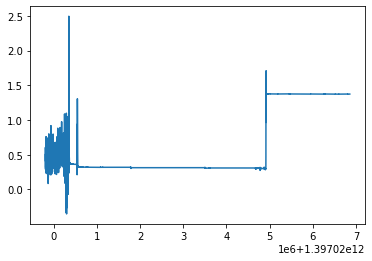

In [7]:
plt.plot(x[0]['timestamp(ms)'], x[0]['roll(rad)'])

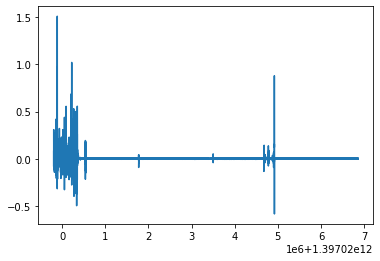

In [8]:
plt.plot(x[0]['timestamp(ms)'], x[0]['acceleration_x(g)'])

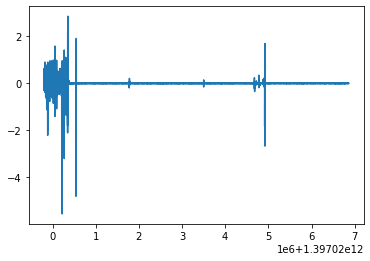

In [9]:
plt.plot(x[0]['timestamp(ms)'], x[0]['angular_velocity_x(rad/sec)'])

#### Deriving new parameters as change in angle makes more sense for shake

In [10]:
for i in range(0,3):
    x[i]['change_roll'] = 0
    x[i]['change_pitch'] = 0
    x[i]['change_yaw'] = 0
    
    for j in range(1,len(x[i])):
        x[i].loc[j,'change_roll'] = np.abs(x[i].loc[j,'roll(rad)'] - x[i].loc[j-1,'roll(rad)'])
        x[i].loc[j,'change_pitch'] = np.abs(x[i].loc[j,'pitch(rad)'] - x[i].loc[j-1,'pitch(rad)'])
        x[i].loc[j,'change_yaw'] = np.abs(x[i].loc[j,'yaw(rad)'] - x[i].loc[j-1,'yaw(rad)'])

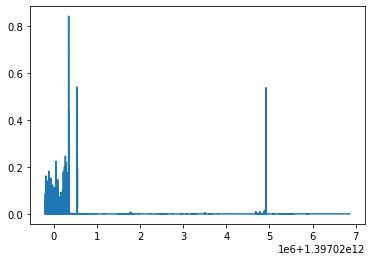

In [11]:
plt.plot(x[0]['timestamp(ms)'], x[0]['change_roll'])

#### Now we have all our data points so let's concatenate the data from different devices and perform our analysis.

In [12]:
x = pd.concat([x[0],x[1],x[2]]).reset_index(drop = True)
y = pd.concat([y[0],y[1],y[2]]).reset_index(drop = True)

In [13]:
x.drop('timestamp(ms)', axis = 1, inplace = True)

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163869 entries, 0 to 163868
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   acceleration_x(g)            163869 non-null  float64
 1   acceleration_y(g)            163869 non-null  float64
 2   acceleration_z(g)            163869 non-null  float64
 3   roll(rad)                    163869 non-null  float64
 4   pitch(rad)                   163869 non-null  float64
 5   yaw(rad)                     163869 non-null  float64
 6   angular_velocity_x(rad/sec)  163869 non-null  float64
 7   angular_velocity_y(rad/sec)  163869 non-null  float64
 8   angular_velocity_z(rad/sec)  163869 non-null  float64
 9   change_roll                  163869 non-null  float64
 10  change_pitch                 163869 non-null  float64
 11  change_yaw                   163869 non-null  float64
dtypes: float64(12)
memory usage: 15.0 MB


#### We have no null values!

In [15]:
x.describe()

,acceleration_x(g),acceleration_y(g),acceleration_z(g),roll(rad),pitch(rad),yaw(rad),angular_velocity_x(rad/sec),angular_velocity_y(rad/sec),angular_velocity_z(rad/sec),change_roll,change_pitch,change_yaw
count,163869.000000,163869.000000,163869.000000,163869.000000,163869.000000,163869.000000,163869.000000,163869.000000,163869.000000,163869.000000,163869.000000,163869.000000
mean,-0.017777,0.022236,0.003558,0.228333,-0.292380,0.816517,0.002184,0.002184,-0.000136,0.033897,0.020022,0.056391
std,0.293505,0.229011,0.195518,0.597216,0.420155,1.586756,0.737516,0.737516,1.188025,0.216496,0.082373,0.421480
min,-7.343800,-5.750900,-7.348900,-3.141200,-1.557000,-3.141100,-28.170800,-28.170800,-25.219800,0.000000,0.000000,0.000000
25%,-0.001100,-0.000900,-0.008300,-0.007300,-0.635500,0.346500,-0.004800,-0.004800,-0.004700,0.000100,0.000100,0.000100
50%,0.001700,0.002900,-0.001100,0.017300,-0.166800,1.391600,0.000200,0.000200,-0.000100,0.000200,0.000200,0.000200
75%,0.004800,0.007100,0.009400,0.319400,-0.064400,2.013100,0.004800,0.004800,0.004700,0.002100,0.001900,0.001600
max,7.666000,8.600600,4.267000,3.139200,1.541600,3.141400,22.085100,22.085100,29.834700,6.181400,1.808000,6.282000


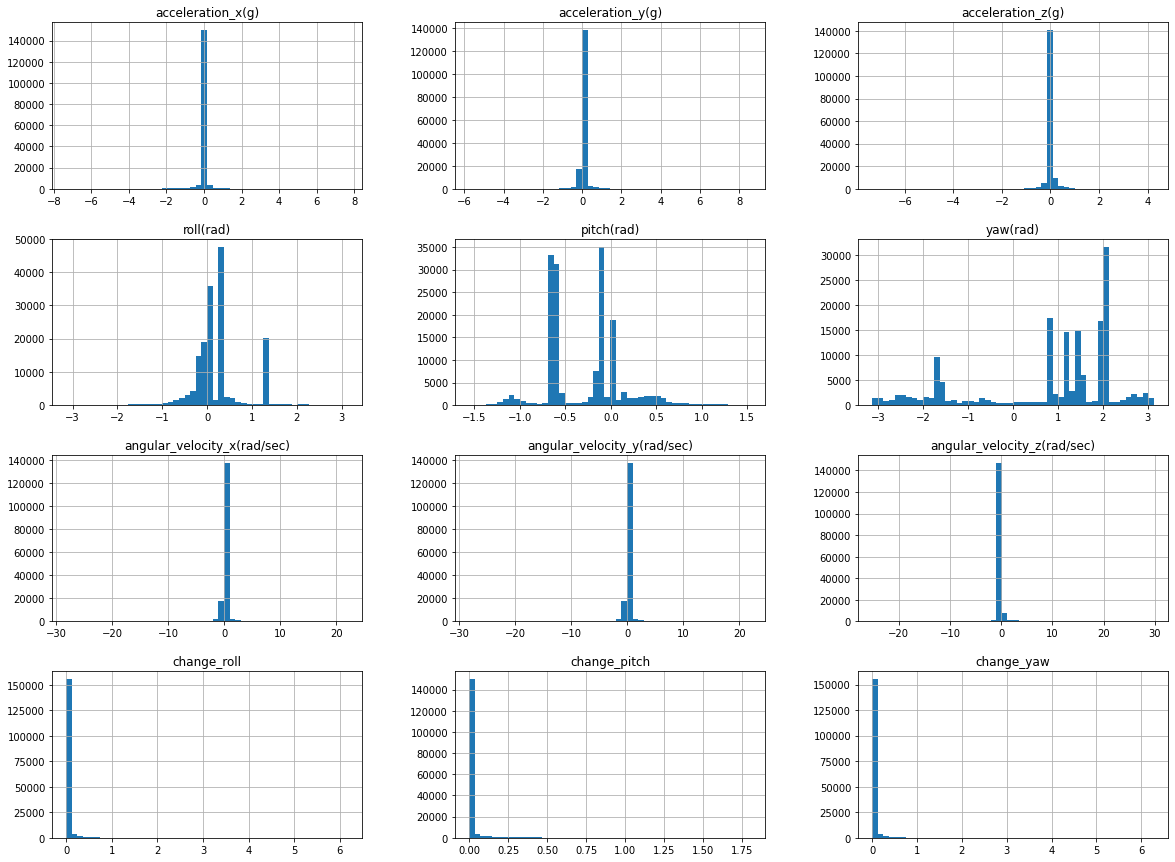

In [16]:
x.hist(bins = 50, figsize=(20,15))
plt.show()

Ratio of no shakes to shakes is : 161323:2546


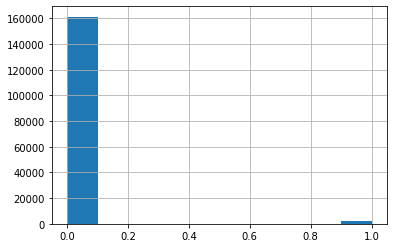

In [17]:
y.hist()
print("Ratio of no shakes to shakes is : %s:%s" %((y == 0).sum(), (y==1).sum()))

In [18]:
data = pd.concat([x,y], axis = 1)
data

,acceleration_x(g),acceleration_y(g),acceleration_z(g),roll(rad),pitch(rad),yaw(rad),angular_velocity_x(rad/sec),angular_velocity_y(rad/sec),angular_velocity_z(rad/sec),change_roll,change_pitch,change_yaw,shake
0,0.0809,-0.2223,0.2055,0.4154,-1.0777,-2.4263,-0.2120,-0.2120,0.3575,0.0000,0.0000,0.0000,0
1,0.0505,-0.1454,0.0934,0.4797,-1.0745,-2.3135,-0.0847,-0.0847,0.6287,0.0643,0.0032,0.1128,0
2,0.1952,0.5475,-0.0295,0.5663,-1.0610,-2.1922,-0.2483,-0.2483,0.4558,0.0866,0.0135,0.1213,0
3,-0.0578,0.1958,0.0850,0.6059,-1.0666,-2.1255,-0.0796,-0.0796,0.0817,0.0396,0.0056,0.0667,0
4,0.0800,-0.1689,-0.2530,0.5836,-1.0347,-2.1527,0.6329,0.6329,0.0925,0.0223,0.0319,0.0272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163864,0.0126,-0.0710,0.1007,-0.1095,0.0656,-2.1065,0.5349,0.5349,0.4683,0.0385,0.0268,0.0792,0
163865,-0.1466,0.0341,-0.3697,-0.0612,0.1041,-1.9838,0.1034,0.1034,1.2189,0.0483,0.0385,0.1227,0
163866,-0.0240,-0.0053,-0.1789,-0.1029,0.1123,-1.9030,0.4614,0.4614,0.8946,0.0417,0.0082,0.0808,0
163867,0.0314,0.0460,0.2010,-0.0142,0.2034,-1.7452,0.4157,0.4157,1.6121,0.0887,0.0911,0.1578,0


In [19]:
print("Percentage of shake instances in our data = ", data['shake'].sum()/len(data))

Percentage of shake instances in our data =  0.015536800737174207


#### We see that the instances of shakes are minority in our data, hence it's an imbalanced dataset. We'll be using techniques which are necessary for dealing with imbalanced dataset so that we get a good representation of both classes of data.

### Stratified sampling

#### For splitting our data into train/test set we use stratified sampling to get similar distribution of shake vs non shake in both

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(x, y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Train: [ 82408 126796 101216 ...  31157  56960  10803] Test: [128186 125029  73044 ... 122956  78285     66]


In [21]:
print("Percentage of shake instances in Train set = ", y_train.sum()/len(y_train))

Percentage of shake instances in Train set =  0.015538350051489378


In [22]:
print("Percentage of shake instances in Test set = ", y_test.sum()/len(y_test))

Percentage of shake instances in Test set =  0.015530603527186184


In [23]:
data_train = pd.concat([X_train,y_train], axis = 1)
data_train

,acceleration_x(g),acceleration_y(g),acceleration_z(g),roll(rad),pitch(rad),yaw(rad),angular_velocity_x(rad/sec),angular_velocity_y(rad/sec),angular_velocity_z(rad/sec),change_roll,change_pitch,change_yaw,shake
82408,0.0584,-0.0296,-0.0052,-0.1106,0.0828,-2.8161,-0.0005,-0.0005,0.0018,0.0139,0.0050,0.0012,0
126796,0.0018,-0.0044,0.0096,0.0052,-0.1007,2.0316,-0.0050,-0.0050,-0.0019,0.0000,0.0003,0.0004,0
101216,0.0016,-0.0026,0.0133,-0.0072,0.0245,-1.6426,0.0100,0.0100,-0.0093,0.0001,0.0001,0.0002,0
156170,-0.0263,0.0087,0.1012,-0.1677,-0.1192,-0.6778,-0.1109,-0.1109,0.0110,0.0008,0.0046,0.0003,0
37899,0.0012,0.0049,-0.0072,0.3075,-0.5767,1.2211,0.0019,0.0019,0.0037,0.0002,0.0001,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47355,0.0017,0.0028,-0.0081,0.3093,-0.5758,1.2059,-0.0006,-0.0006,-0.0003,0.0001,0.0000,0.0001,0
12389,-0.0003,0.0080,-0.0114,0.3195,-0.6408,1.4875,0.0028,0.0028,-0.0048,0.0002,0.0001,0.0001,0
31157,0.0010,0.0037,-0.0079,0.3139,-0.6147,0.8087,0.0032,0.0032,0.0027,0.0004,0.0001,0.0005,0
56960,0.0040,0.0017,0.0033,1.3747,-0.6633,1.9908,-0.0057,-0.0057,-0.0052,0.0004,0.0001,0.0002,0


### Correlation Plot

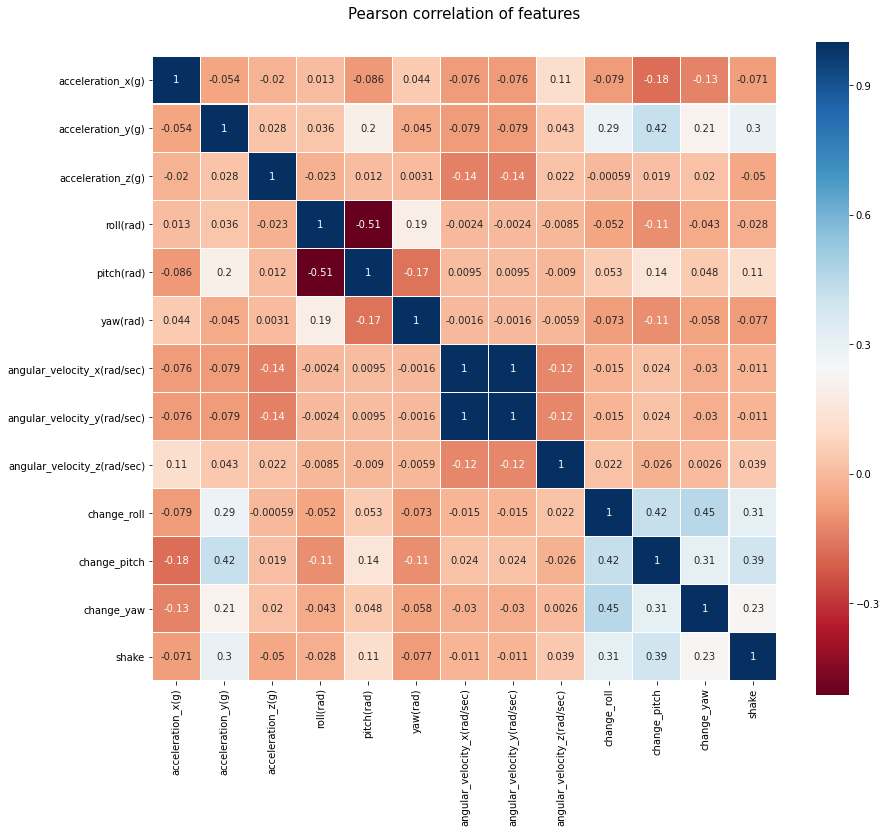

In [24]:
colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title('Pearson correlation of features', y = 1.05, size = 15)
sns.heatmap(data_train.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

In [25]:
data_train.astype(float).corr()['shake']

acceleration_x(g)             -0.071210
acceleration_y(g)              0.297007
acceleration_z(g)             -0.050190
roll(rad)                     -0.028239
pitch(rad)                     0.113527
yaw(rad)                      -0.076578
angular_velocity_x(rad/sec)   -0.011490
angular_velocity_y(rad/sec)   -0.011490
angular_velocity_z(rad/sec)    0.038763
change_roll                    0.312337
change_pitch                   0.393817
change_yaw                     0.232478
shake                          1.000000
Name: shake, dtype: float64

#### We observe that our derived variables (change) are fairly correlated with shake.

#### We observe that angular_velocity_x and angular_velocity_y have correlation 1. Checking the data and above tables we observe that they have the same data so we can delete one of them.

In [26]:
del X_train['angular_velocity_y(rad/sec)']
del X_test['angular_velocity_y(rad/sec)']

## Classification

In [27]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV

In [28]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
svc = make_pipeline(StandardScaler(), SVC(probability = True))
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
exttree = ExtraTreesClassifier(random_state=1)
sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(random_state=1))

In [29]:
estimators = [lr, dt, rf, svc, knn, exttree, sgd_clf]
labels = ['Linear Regression', 
            'Decision Tree', 
            'Random Forest Classifier', 
            'SVC', 
            'k Nearest Neighbour',
            'Extra Tree Classifier']

In [30]:
def estimate(x_train, y_train, estimators, labels):
    df_result = pd.DataFrame()
    
    row_index = 0
    for est, est_name in zip(estimators, labels):
        skfolds = StratifiedKFold(n_splits=3, random_state=42)
        cv_results = []
        
        for train_index, test_index in skfolds.split(x_train, y_train):
            clone_clf = clone(est)

            x_train_folds = x_train.iloc[train_index]
            y_train_folds = y_train.iloc[train_index]
            x_test_fold = x_train.iloc[test_index]
            y_test_fold = y_train.iloc[test_index]
            clone_clf.fit(x_train_folds, y_train_folds)
            
            y_pred = clone_clf.predict(x_test_fold)
            n_correct = sum(y_pred == y_test_fold)
            cv_results.append(n_correct / len(y_pred))
        
        df_result.loc[row_index, 'Model name'] = est_name
        df_result.loc[row_index, 'Test_accuracy'] = np.mean(cv_results)
        df_result.loc[row_index, 'Standard Deviation'] = np.std(cv_results)
        
        row_index +=1
        
    df_result.sort_values(by=['Test_accuracy'], ascending = False, inplace = True, ignore_index = True)
    
    return df_result

In [31]:
estimate(X_train, y_train, estimators, labels)

,Model name,Test_accuracy,Standard Deviation
0,Random Forest Classifier,0.987276,0.000211
1,Extra Tree Classifier,0.987231,0.000123
2,k Nearest Neighbour,0.986430,0.000230
3,Linear Regression,0.985263,0.000329
4,SVC,0.984744,0.000181
5,Decision Tree,0.980167,0.000560


#### Observe that any model would have a very high accuracy since we are dealing with imbalanced dataset. So accuracy is not a very good measure to measure our performance. We will use other performance metrics too.

### Precision/Recall/F1-score

In [32]:
def estimate(x_train, y_train, estimators, labels):
    df_result = pd.DataFrame()
    mat = {}
    row_index = 0
    for est, est_name in zip(estimators, labels):
        skfolds = StratifiedKFold(n_splits=3, random_state=42)
        cv_results = []
        precision_results = []
        recall_results = []
        f1_results = []
        conf_mat = []
        
        for train_index, test_index in skfolds.split(x_train, y_train):
            clone_clf = clone(est)

            x_train_folds = x_train.iloc[train_index]
            y_train_folds = y_train.iloc[train_index]
            x_test_fold = x_train.iloc[test_index]
            y_test_fold = y_train.iloc[test_index]
            clone_clf.fit(x_train_folds, y_train_folds)
            
            y_pred = clone_clf.predict(x_test_fold)
            n_correct = sum(y_pred == y_test_fold)
            cv_results.append(n_correct / len(y_pred))
            precision_results.append(precision_score(y_test_fold, y_pred))
            recall_results.append(recall_score(y_test_fold, y_pred))
            f1_results.append(f1_score(y_test_fold, y_pred))
            
            conf_mat.append(confusion_matrix(y_test_fold, y_pred))
        
        df_result.loc[row_index, 'Model name'] = est_name
        df_result.loc[row_index, 'Test_accuracy'] = np.mean(cv_results)
        df_result.loc[row_index, 'Precision_score'] = np.mean(precision_results)
        df_result.loc[row_index, 'Recall_score'] = np.mean(recall_results)
        df_result.loc[row_index, 'F1_score'] = np.mean(f1_results)
        df_result.loc[row_index, 'Standard Deviation'] = np.std(cv_results)
        
        mat[est_name] = conf_mat        
        
        row_index +=1
        
    df_result.sort_values(by=['Test_accuracy'], ascending = False, inplace = True, ignore_index = True)
    
    return df_result, mat

In [33]:
df_result, mat = estimate(X_train, y_train, estimators, labels)

In [46]:
df_result

,Model name,Test_accuracy,Precision_score,Recall_score,F1_score,Standard Deviation
0,Random Forest Classifier,0.987276,0.736954,0.282278,0.407975,0.000211
1,Extra Tree Classifier,0.987231,0.749421,0.269023,0.395570,0.000123
2,k Nearest Neighbour,0.986430,0.650975,0.273932,0.385494,0.000230
3,Linear Regression,0.985263,0.581242,0.189003,0.285047,0.000329
4,SVC,0.984744,0.584177,0.062347,0.112564,0.000181
5,Decision Tree,0.980167,0.371481,0.398625,0.384541,0.000560


In [45]:
for d in mat.items():
    print(d[0])
    print(d[1][0])
    print(d[1][1])
    print(d[1][2])
    

Linear Regression
[[42940    80]
 [  551   128]]
[[42932    87]
 [  550   129]]
[[42906   113]
 [  551   128]]
Decision Tree
[[42574   446]
 [  412   267]]
[[42574   445]
 [  397   282]]
[[42535   484]
 [  416   263]]
Random Forest Classifier
[[42963    57]
 [  493   186]]
[[42946    73]
 [  476   203]]
[[42943    76]
 [  493   186]]
SVC
[[42994    26]
 [  643    36]]
[[42983    36]
 [  639    40]]
[[42991    28]
 [  628    51]]
k Nearest Neighbour
[[42931    89]
 [  490   189]]
[[42920    99]
 [  499   180]]
[[42907   112]
 [  490   189]]
Extra Tree Classifier
[[42968    52]
 [  500   179]]
[[42963    56]
 [  501   178]]
[[42942    77]
 [  488   191]]


#### We observe that "Random Forest Classifier" is the best among all given classifiers

## Hyperparameter Tuning

### Grid Search

In [52]:
from sklearn.metrics import make_scorer, accuracy_score

In [56]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'accuracy_score': make_scorer(accuracy_score)
}

#skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

rf_params = {'random_state': [1],
             'max_depth': [10, 20, 30],
             'max_features': [5, 10, 20],
             'min_samples_leaf': [2,4,6],
             'min_samples_split': [2,4,6],
             'n_estimators': [10,20,30]}

grid = GridSearchCV(rf, 
                    rf_params,
                    scoring = scorers,
                    refit = 'f1_score',
                    cv = 3,  #skf
                    return_train_score=True,
                    n_jobs = -1)

grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6]

In [57]:
grid.best_params_

{'max_depth': 30,
 'max_features': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 30,
 'random_state': 1}

#### Now I tried with many different possibilities each time taking a more closer value to best performing hyperparameter values.

In [64]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score),
    'accuracy_score': make_scorer(accuracy_score)
}

#skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

rf_params = {'random_state': [1],
             'max_depth': [33,35,37],
             'max_features': [8, 9, 10],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [24, 25, 26]}

grid = GridSearchCV(rf, 
                    rf_params,
                    scoring = scorers,
                    refit = 'f1_score',
                    cv = 3,  #skf
                    return_train_score=True,
                    n_jobs = -1)

grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             param_grid={'max_depth': [33, 35, 37], 'max_features': [8, 9, 10],
                         'min_s

In [65]:
grid.best_params_

{'max_depth': 35,
 'max_features': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25,
 'random_state': 1}

#### We get our list of best hyperparameters.. Now we are ready for the final classification

In [66]:
rf_gs = RandomForestClassifier(**grid.best_params_)

In [82]:
def Best_Clf(clf, x_train, y_train, x_test, y_test):

    skfolds = StratifiedKFold(n_splits=3, random_state=42)

    cv_results = []
    precision_results = []
    recall_results = []
    f1_results = []

    print("-----------------Train set CV result----------------------")
    for train_index, test_index in skfolds.split(x_train, y_train):

        x_train_folds = x_train.iloc[train_index]
        y_train_folds = y_train.iloc[train_index]
        x_test_fold = x_train.iloc[test_index]
        y_test_fold = y_train.iloc[test_index]
        clf.fit(x_train_folds, y_train_folds)

        y_pred_cv = clf.predict(x_test_fold)
        n_correct = sum(y_pred_cv == y_test_fold)
        cv_results.append(n_correct / len(y_pred_cv))
        precision_results.append(precision_score(y_test_fold, y_pred_cv))
        recall_results.append(recall_score(y_test_fold, y_pred_cv))
        f1_results.append(f1_score(y_test_fold, y_pred_cv))
        print(confusion_matrix(y_test_fold, y_pred_cv))


    print("Model name: Random Forest Classifier" )
    print("Accuracy: ", np.mean(cv_results))
    print('Precision_score: ', np.mean(precision_results))
    print('Recall_score: ', np.mean(recall_results))
    print('F1_score: ', np.mean(f1_results))
    print('Standard Deviation: ', np.std(cv_results))
    print("----------------------------------------------------------")
    
    
    print("---------------------Test set result-----------------------")
    print("Model name: Random Forest Classifier" )

    y_pred = clf.predict(x_test)
    n_correct = sum(y_pred == y_test)
    result = (n_correct / len(y_pred))
    precision = (precision_score(y_test, y_pred))
    recall = (recall_score(y_test, y_pred))
    f1 = (f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    print("Accuracy: ", result)
    print('Precision_score: ', precision)
    print('Recall_score: ', recall)
    print('F1_score: ', f1)
    print("----------------------------------------------------------")
    
    return y_pred_cv, y_pred

In [83]:
y_pred_cv, y_pred = Best_Clf(rf_gs, X_train, y_train, X_test, y_test)

-----------------Train set CV result----------------------
[[42932    88]
 [  453   226]]
[[42918   101]
 [  467   212]]
[[42896   123]
 [  459   220]]
Model name: Random Forest Classifier
Accuracy:  0.9871009533628237
Precision_score:  0.6794869779230899
Recall_score:  0.32302405498281783
F1_score:  0.437711344900489
Standard Deviation:  0.00038953336864617133
----------------------------------------------------------
---------------------Test set result-----------------------
Model name: Random Forest Classifier
[[32182    83]
 [  367   142]]
Accuracy:  0.986269603954354
Precision_score:  0.6311111111111111
Recall_score:  0.27897838899803534
F1_score:  0.3869209809264305
----------------------------------------------------------


In [87]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.638202971037062

In [94]:
for name, score in zip(X_train.columns, rf_gs.feature_importances_):
    print(name, score)

acceleration_x(g) 0.10170952926868468
acceleration_y(g) 0.19362658628701002
acceleration_z(g) 0.09754985137922756
roll(rad) 0.06774212345133818
pitch(rad) 0.07649233631172696
yaw(rad) 0.06554271798327406
angular_velocity_x(rad/sec) 0.058633885927254055
angular_velocity_z(rad/sec) 0.06965512083645405
change_roll 0.09301968985437327
change_pitch 0.08745820006241392
change_yaw 0.08856995863824331


### Future Plans

#### Later we can improve by deriving better different features. 
#### Can work on preprocessing steps and include feature selection methods
#### Can try few different classification algorithms like LightGBM, Extratrees, Boosting, etc. 
#### From graph patterns we observe there is some noise/flaw in data so we could deal with that. 
#### Another thing would be to use Randomized_Search_CV 
#### In the end we can still try to improve out performance for shake detection.

#### Reference 
#### https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/
#### https://scikit-learn.org/stable/index.html
